# Clustering - Wine Data.ipynb

#### João Vitor de Paiva Marcotti
#### Electrical Engineer - State University of Maringá - UEM (Brazil)
#### 8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)
#### Open to Work
#### Contact: joaovmarcotti@hotmail.com

In [3]:
# Import the Pandas, Matplotlib and Seaborn libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the K-Means clustering model
from sklearn.cluster import KMeans

**Alcohol:** The alcohol content in wine is usually expressed as a percentage of alcohol by volume. It's a key component that contributes to the wine's body, texture, and overall character.

**Malic Acid:** Malic acid is a naturally occurring acid found in grapes and other fruits. It's an important component of wine's acidity, affecting its taste, balance, and aging potential.

**Ash:** The ash content in wine refers to the inorganic minerals and elements left behind after the organic matter is burned off. It's a measure of the mineral content in the wine.

**Alkalinity of Ash:** This is a measure of the wine's overall alkalinity, which is influenced by the minerals present in the ash. It can affect the wine's taste and chemical stability.

**Magnesium:** Magnesium is one of the minerals found in wine. Its presence can influence the wine's taste and mouthfeel.

**Total Phenols:** Total phenols encompass a group of compounds, including tannins and other antioxidants, that are derived from grape skins and seeds. They play a role in the wine's color, structure, and aging potential.

**Flavanoids:** Flavanoids are a subgroup of phenolic compounds found in wine. They contribute to the wine's color, flavor, and overall health benefits.

**Nonflavanoid Phenols:** These are phenolic compounds that are not classified as flavanoids. They also contribute to the wine's taste, color, and antioxidant properties.

**Proanthocyanins:** These are a type of flavanoid compound found in red wines, particularly in grape skins. They contribute to color stability, astringency, and age-worthiness of red wines.

**Color Intensity:** Color intensity refers to the depth and concentration of color in the wine. It's influenced by factors like grape variety, skin contact during fermentation, and aging.

**Hue:** Hue refers to the shade of color in the wine, often described as its "color tone." It can provide insights into the wine's age and varietal characteristics.

**OD280/OD315 of Diluted Wines:** This refers to the ratio of optical density measurements taken at wavelengths of 280nm and 315nm. It's often used to estimate the concentration of proteins and phenolic compounds in wine.

**Proline:** Proline is an amino acid found in grapes and wine. Its concentration can provide information about the health of the grapes, fermentation process, and wine stability.

In [4]:
# Import the dataframe from a .csv file
df = pd.read_csv('wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
# Renames the columns
df.columns = df.columns.str.replace('_',' ')
x_columns = df.columns

<Axes: title={'center': 'Correlation Heatmap'}>

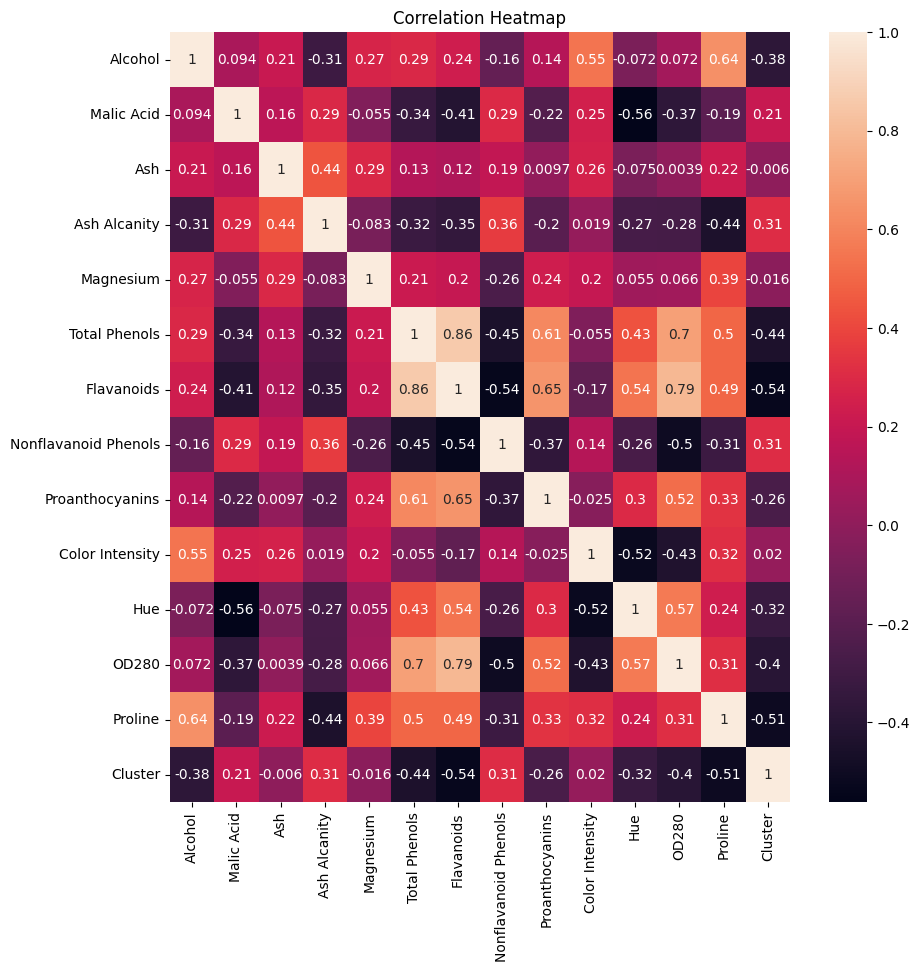

In [14]:
# Displays the correlation between the variables
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot=True)

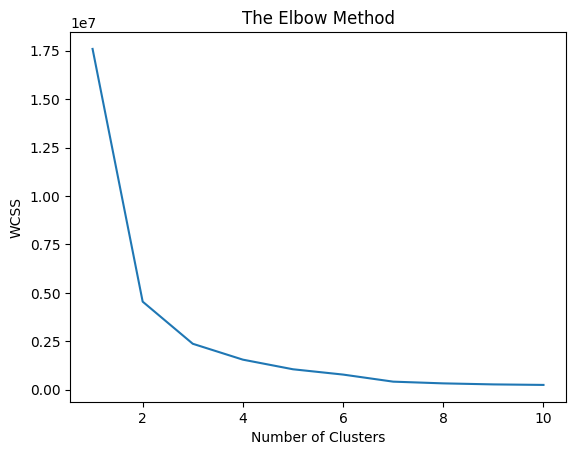

In [7]:
# Uses the Elbow Method to find the right number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init="auto", random_state=1)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
  # Declares the K-Means model
  kmeans = KMeans(n_clusters=3, init='k-means++', n_init="auto", random_state=1)
  y_means = kmeans.fit_predict(df)

In [9]:
# Adds a Cluster column to the dataframe
df['Cluster'] = y_means

In [10]:
# Displays scatter plots between all the variables to find which one the best represents the clustering
sns.pairplot(data=df, x_vars=x_columns, y_vars=x_columns, hue='Cluster')

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='Alcohol', ylabel='Proline'>

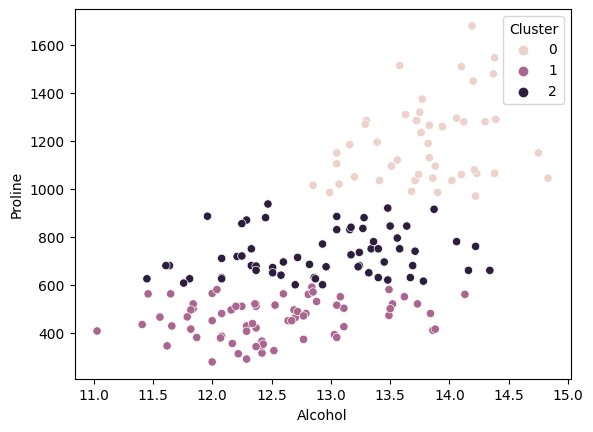

In [11]:
# Displays the scatter plot between Proline and Alcohol
sns.scatterplot(data=df, x='Alcohol', y='Proline', hue='Cluster')

In [12]:
# Calculates the variables mean of each cluster
df_mean = pd.DataFrame()
for cluster in sorted(df['Cluster'].unique()):
  df_mean[f'Cluster {cluster}'] = df[df['Cluster']==cluster].mean().values

In [13]:
# Displays the variables mean of each cluster
df_mean = df_mean.rename(index=dict(enumerate(df.columns)))
df_mean = df_mean[:-1]
df_mean = df_mean.round(2)
df_mean

,Cluster 0,Cluster 1,Cluster 2
Alcohol,13.80,12.52,12.93
Malic Acid,1.88,2.49,2.50
Ash,2.43,2.29,2.41
Ash Alcanity,17.02,20.82,19.89
Magnesium,105.51,92.35,103.60
Total Phenols,2.87,2.07,2.11
Flavanoids,3.01,1.76,1.58
Nonflavanoid Phenols,0.29,0.39,0.39
Proanthocyanins,1.91,1.45,1.50
Color Intensity,5.70,4.09,5.65
